# what is kernel PCA:

Kernel PCA (Principal Component Analysis) is a non-linear version of PCA that uses a kernel function to transform the original data into a higher dimensional feature space before applying PCA. This allows for capturing more complex and non-linear relationships between the variables in the data.

Here's an example of how to perform Kernel PCA step by step:

1.Data Preparation:
Let's say you have a dataset with n observations and p variables. The first step is to standardize the data to ensure that each variable has a mean of zero and a standard deviation of one. This is necessary to make sure that each variable has equal importance in the analysis.

2.Choosing a kernel:
The next step is to choose an appropriate kernel function. The most commonly used kernel functions are the Gaussian kernel, polynomial kernel, and sigmoid kernel. The choice of kernel function depends on the type of data and the problem you are trying to solve.

3.Calculating Kernel matrix:
Once you have chosen a kernel function, the next step is to calculate the kernel matrix. This is a matrix that shows the pairwise similarity between each observation in the data. In other words, it tells us how similar each observation is to every other observation in the data.

4.Eigenvalue Decomposition:
The kernel matrix is then decomposed into its eigenvectors and eigenvalues. The eigenvectors represent the directions in the new feature space that capture the most variation in the data, while the eigenvalues represent the amount of variation captured by each eigenvector.

5.Selecting the number of components:
The next step is to select the number of principal components to retain. This can be done by looking at the scree plot, which shows the eigenvalues of each component in decreasing order. The number of components to retain is usually determined by selecting the number of components that explain a certain percentage of the total variance in the data.

6.Projecting the data:
The final step is to project the data onto the selected principal components. This will transform the data into a new feature space where the first principal component captures the most variation in the data, followed by the second principal component, and so on.

Real-world example: Suppose you have a dataset with customer purchase history, including information about the type of products purchased, the amount spent, and the time of purchase. You want to analyze this data to identify patterns and trends that can help you understand customer behavior and make more informed marketing decisions.

First, you would standardize the data and choose an appropriate kernel function, such as the Gaussian kernel. Then, you would calculate the kernel matrix and perform eigenvalue decomposition to identify the principal components that capture the most variation in the data. Next, you would select the number of principal components to retain based on the scree plot.

Finally, you would project the data onto the selected principal components to transform the data into a new feature space. This would allow you to identify patterns and trends that are not easily visible in the original data, such as non-linear relationships between variables or clusters of similar customer behavior. You could then use this information to develop targeted marketing campaigns or improve product recommendations for individual customers.





# Import Required Libraries:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset:

In [2]:
dataset = pd.read_csv("Wine.csv")
x = dataset.iloc[:,:-1].values
y = dataset.iloc[: ,-1].values

# Splitting the dataset into training and testing:

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

# Feature scaling:

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying the  Kernel PCA:

In [6]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Training the Logistic Regression Model on The Training set:

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [8]:
y_pred = classifier.predict(X_test)

# Making the confusion matrix :

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

# Visualising the training set:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


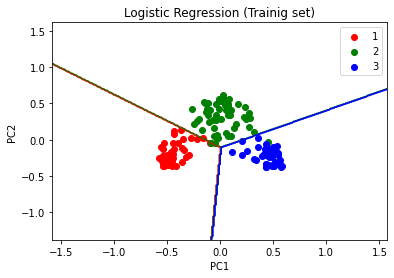

In [10]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_train,Y_train
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.01),
        np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1,step = 0.01))
plt.contour(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                                    alpha = 0.75,cmap = ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
               c = ListedColormap(('red','green','blue'))(i),label = j)
plt.title('Logistic Regression (Trainig set)')
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.legend()
plt.show()

# Visualising the test set:¶

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


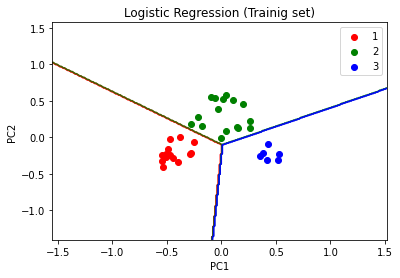

In [11]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_test,Y_test
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.01),
        np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1,step = 0.01))
plt.contour(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                                    alpha = 0.75,cmap = ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
               c = ListedColormap(('red','green','blue'))(i),label = j)
plt.title('Logistic Regression (Trainig set)')
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.legend()
plt.show()